# Worldwide App User Behavior - Exploratory Data Analysis

In this notebook, we will explore the Worldwide Mobile App User Behavior dataset and present our findings using Matplotlib and Seaborn visualization libraries.

#### [How are users adopting the app store concept?](#App-Store-Adoption)
 - [What is the distribution of users across mobile app platforms?](#User-distribution-across-mobile-app-platforms)
 - [How frequently do users visit their app stores to look for apps?](#Frequency-of-visit)
 - [On average, how many apps do users download per month?](#Average-Downloads)
 - [How do users find apps?](#Finding-Apps) 

#### [What needs are users trying to meet with apps?](#User-Needs)
 - [What triggers users to start looking for apps?](#Triggers)
 - [Why do users download apps?](#Reasons-for-download)
 - [What types of apps do they download?](#App-types)
 
#### [What are the features of an app that influence its selection or abandonment?](#Influencing-Features)
 - [What are the factors that influence users' choices of apps?](#Choice)
 - [Given that ratings influence app selection, why do users rate apps?](#Rating)
 - [Why do users pay for apps?](#Payment)
 - [Why do users stop using an app?](#Abandonment)
 
#### [What is the demographics of the surveyed users and their payment choices?](#Distribution-of-users)
 - [Gender Ratio](#Gender-Ratio)
 - [Nationality](#Nationality)
 - [Country of Residence](#Country-of-Residence)
 - [Age](#Age)
  
#### [How do behaviors vary and their respective payment choices?](#Personality-Traits)
 - [Extraverted and Enthusiastic](#Extraverted,-Enthusiastic)
 - [Critical and Quarrelsome](#Critical,-Quarrelsome)
 - [Dependable and Self-disciplined](#Dependable,-Self-disciplined)
 - [Anxious and Easily upset](#Anxious,-Easily-upset)
 - [Open to new experiences and Complex](#Open-to-new-experiences,-Complex)
 - [Reserved and Quiet](#Reserved,-Quiet)
 - [Sympathetic and Warm](#Sympathetic,-Warm)
 - [Disorganized and Careless](#Disorganized,-Careless)
 - [Calm and Emotionally stable](#Calm,-Emotionally-stable)
 - [Conventional and Uncreative](#Conventional,-Uncreative)

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
sns.set_style('whitegrid')

In [2]:
# Importing the dataset
clean = pd.read_excel('./Data/clean_data.xlsx', index_col=0)

In [3]:
clean.head()

,startdate,enddate,response,participant_type,browser,browser_version,os,screen_resolution,flash_version,java_support,...,extraverted_enthusiastic,critical_quarrelsome,dependable_self_disciplined,anxious_easily_upset,open_to_new_experiences_complex,reserved_quiet,sympathetic_warm,disorganized_careless,calm_emotionally_stable,conventional_uncreative
id,,,,,,,,,,,,,,,,,,,,,
1,2012-09-26 07:46:07,2012-09-26 07:46:21,2,1,Chrome,21.0.1180.89,WOW64,1280x800,11.3.31,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-09-26 07:45:19,2012-09-26 07:56:41,1,1,Safari,6,CPU iPhone OS 6_0 like Mac OS X,320x480,-1,0.0,...,6.0,3.0,7.0,2.0,6.0,3.0,4.0,3.0,4.0,4.0
3,2012-09-26 07:45:35,2012-09-26 08:01:56,1,1,Safari,6,CPU OS 6_0 like Mac OS X,768x1024,-1,0.0,...,4.0,4.0,5.0,2.0,3.0,3.0,5.0,3.0,5.0,3.0
4,2012-09-26 16:58:29,2012-09-26 17:05:50,1,1,Firefox,15.0.1,Intel Mac OS X 10.6,1920x1200,11.4.402,1.0,...,4.0,3.0,6.0,3.0,5.0,5.0,5.0,2.0,5.0,3.0
5,2012-09-27 04:16:04,2012-09-27 04:24:56,1,1,Chrome,22.0.1229.79,Intel Mac OS X 10_7_4,1280x800,11.4.402,1.0,...,2.0,6.0,4.0,3.0,6.0,5.0,7.0,3.0,5.0,3.0


**Using only completed responses**

The dataset contains some incomplete responses, we will filter those out.

In [4]:
clean.response.value_counts(dropna=False)

1    4824
0    2126
3    1653
2    1208
5     394
4       3
Name: response, dtype: int64

In [5]:
complete = clean[clean.response == 1]

# App Store Adoption

It is important to understand how best to develop apps and app stores such that users can find apps. In this section, we investigate user behavior relating to seeking apps, in terms of the platform used, frequency of use of that platform, frequency of downloads, and methods used to search for apps.

#### User distribution across mobile app platforms

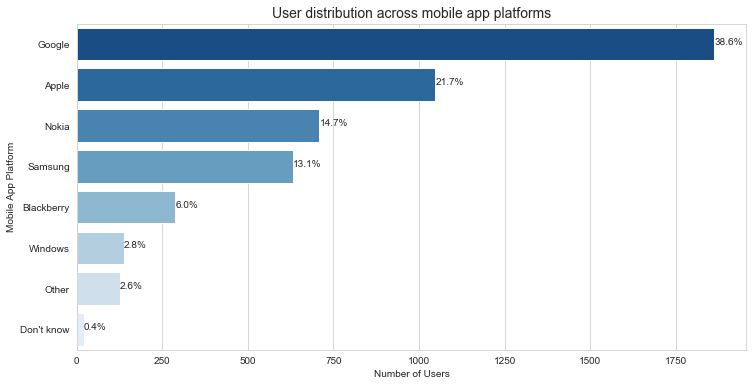

In [6]:
ax = plt.figure(figsize=(12, 6))
ax = sns.countplot(y='app_store', data=complete, order = complete['app_store'].value_counts().index, 
                   palette='Blues_r')
plt.title('User distribution across mobile app platforms', fontsize=14)
plt.xlabel('Number of Users')
plt.ylabel('Mobile App Platform')

total = len(complete)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Google (Android) Play Store was the most used app store followed by Apple (iOS) App Store. This is consistent with the current market share of smartphone operating systems.

#### Frequency of visit

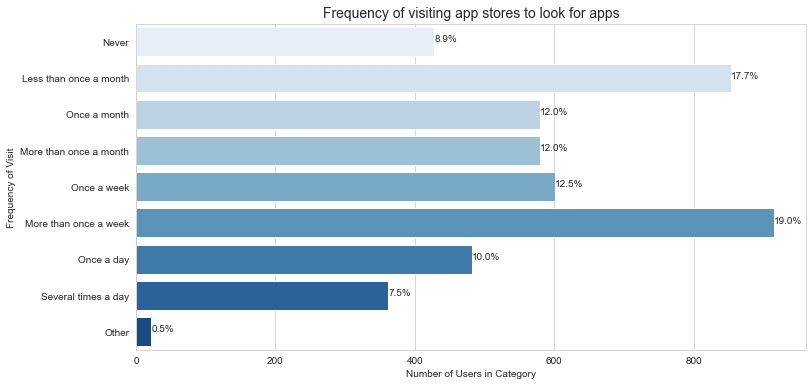

In [7]:
ax = plt.figure(figsize=(12, 6))
ax = sns.countplot(y="app_store_visit_frequency", data=complete, palette='Blues')
plt.title('Frequency of visiting app stores to look for apps', fontsize=14)
plt.xlabel('Number of Users in Category')
plt.ylabel('Frequency of Visit')
ax.set_yticklabels(['Never', 'Less than once a month', 'Once a month', 'More than once a month', 'Once a week',
                    'More than once a week', 'Once a day', 'Several times a day', 'Other'])

total = len(complete)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

More than one a week was the most common frequency that users visited their app store. This was followed by less than once a month and once a week. The least common frequency of visiting the app store was several times a day. Approximately, 9% of users reported not visiting the app stores to look for apps. 

#### Average Downloads

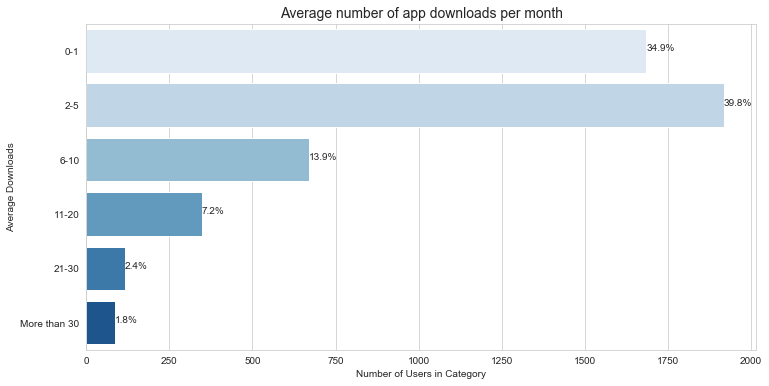

In [8]:
ax = plt.figure(figsize=(12, 6))
ax = sns.countplot(y="apps_per_month\n", data=complete, palette='Blues')
plt.title('Average number of app downloads per month', fontsize=14)
plt.xlabel('Number of Users in Category')
plt.ylabel('Average Downloads')
ax.set_yticklabels(['0-1', '2-5', '6-10', '11-20', '21-30', 'More than 30'])

total = len(complete)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

The highest proportion of users downloaded 2–5 apps per month (40%). This was followed by 0–1 apps (35%), 6–10 apps (14%), 11–20 apps (7%), and 21–30 apps (2%). Only 2% of users downloaded more than 30 apps per month.

#### Finding Apps

In [9]:
find_apps = complete[['app_comparison', 'first_app_in_list', 'featured_app', 'top_downloads', 'random_browsing',
                      'keyword_search', 'app_review_websites', 'search_engines', 'find_apps_other']]

In [10]:
# Function definition to created weighted coulmns

def to_hundred(data):
    data = data.fillna(0)
    data['rowsum'] = data.sum(axis=1)
    data = data.loc[:, data.columns != 'rowsum'].div(data['rowsum'], axis=0)
    data.loc['total'] = data.sum()
    data = data.transpose()
    data = data.sort_values(by=['total'], ascending=False)
    return data

In [11]:
find_apps = to_hundred(find_apps)

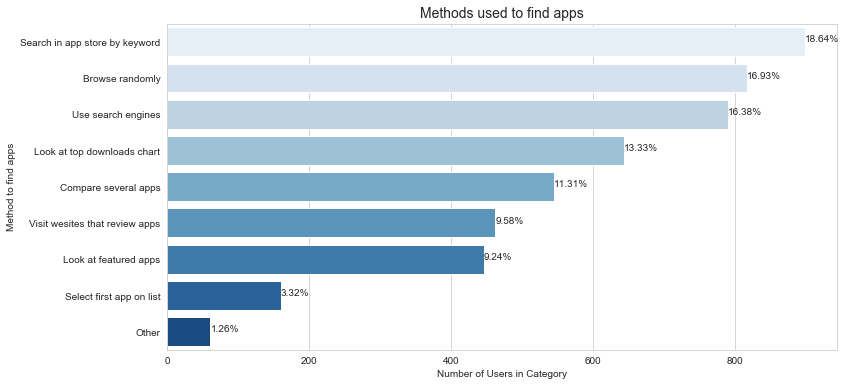

In [12]:
ax = plt.figure(figsize=(12, 6))
ax = sns.barplot(x=find_apps.total, y=find_apps.index, palette='Blues')
plt.title('Methods used to find apps', fontsize=14)
plt.xlabel('Number of Users in Category')
plt.ylabel('Method to find apps')
ax.set_yticklabels(['Search in app store by keyword', 'Browse randomly', 'Use search engines',
                    'Look at top downloads chart', 'Compare several apps', 'Visit wesites that review apps',
                    'Look at featured apps', 'Select first app on list', 'Other'])

total = len(complete)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

The majority of people found apps by keyword search in the app store(19%). This was followed by browsing randomly (17%), using search engines such as Google(16%), looking at top downloads chart(13%), and comparing several apps(11%). The least number of users reported downloading the first app they found(3%), suggesting that users tend to spend some time choosing apps, even if the apps were free.

# User Needs

In addition to the mechanics of finding apps, there are the fundamental needs of the users. In this section, we aim to understand what might prompt a user to consider looking for an app in the first place, why they download apps, and which types of apps they prefer.

#### Triggers

In [13]:
look_apps = complete[['feeling_depressed', 'to_carry_out_a_task', 'feeling_bored', 'to_be_entertained', 'to_know_something',
                     'look_for_apps_other']]

In [14]:
look_apps = to_hundred(look_apps)

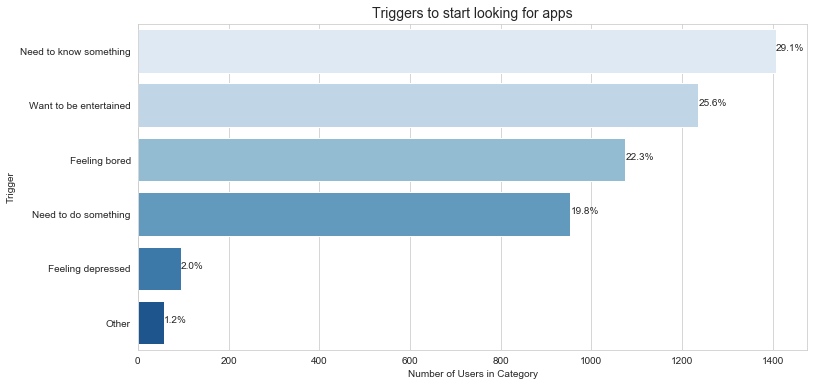

In [15]:
ax = plt.figure(figsize=(12, 6))
ax = sns.barplot(x=look_apps.total, y=look_apps.index, palette='Blues')
plt.title('Triggers to start looking for apps', fontsize=14)
plt.xlabel('Number of Users in Category')
plt.ylabel('Trigger')
ax.set_yticklabels(['Need to know something', 'Want to be entertained', 'Feeling bored',
                    'Need to do something', 'Feeling depressed', 'Other'])

total = len(complete)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

The most popular situation that triggered users to look for apps was when they needed to know something (29%), followed by when they wanted to be entertained (26%), and when they were feeling bored (22%). The least popular reason to look for apps was when users were depressed (2%). However, the respondents’ willingness to specify this option might have been influenced by social desirability bias.

#### **Reasons for download**

In [16]:
download_reasons = complete[['family_friends_interaction', 'stranger_interaction', 'carrying_task', 'bcoz_featured_app',
                             'top_downloaded_app', 'advertised_in_the_apps_using', 'for_entertainment', 'curiosity', 
                             'impulsive_purchase', 'features_brands_celebrities', 'media_mention', 'website_extension',
                             'recommended', 'for_someone_else', 'why_download_app_other']]

In [17]:
download_reasons = to_hundred(download_reasons)

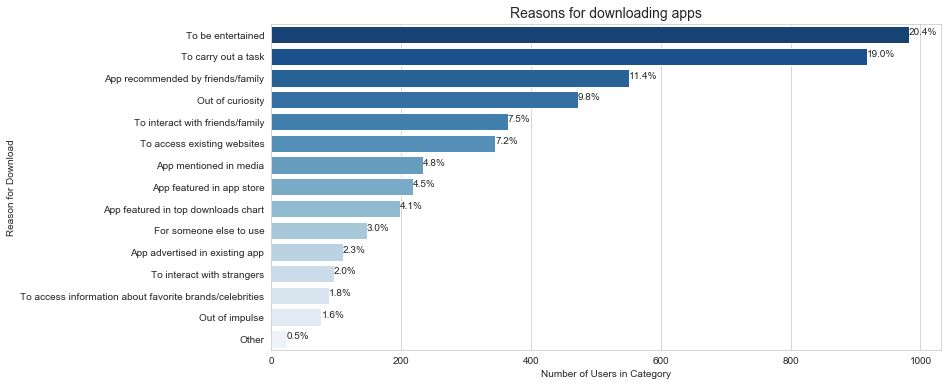

In [18]:
ax = plt.figure(figsize=(12, 6))
ax = sns.barplot(x=download_reasons.total, y=download_reasons.index, palette='Blues_r')
plt.title('Reasons for downloading apps', fontsize=14)
plt.xlabel('Number of Users in Category')
plt.ylabel('Reason for Download')
ax.set_yticklabels(['To be entertained', 'To carry out a task', 'App recommended by friends/family', 'Out of curiosity',
                    'To interact with friends/family', 'To access existing websites', 'App mentioned in media',
                    'App featured in app store', 'App featured in top downloads chart', 'For someone else to use',
                    'App advertised in existing app', 'To interact with strangers', 
                    'To access information about favorite brands/celebrities', 'Out of impulse', 'Other'])

total = len(complete)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

The most popular reason for users to download an app was to be entertained (20%), followed by to carry out a task (19%). The third most popular reason for users to download an app was because the app was recommended by friends or family (11%). This shows the importance of viral marketing and social networks on app downloads. Curiosity was also an important reason (10%), which meant that novel or quirky apps have the potential to attract downloads in the app store.

#### **App types**

In [19]:
app_types = complete[['navigation', 'business', 'catalogues', 'travel', 'books', 'photo_video', 'lifestyle',
                      'entertainment', 'finance', 'news', 'health_fitness', 'games', 'food_drink', 'education', 
                      'medical', 'social_networking', 'reference', 'sports', 'utilities', 'weather', 'productivity',
                      'music', 'app_type_other']]

In [20]:
app_types = to_hundred(app_types)

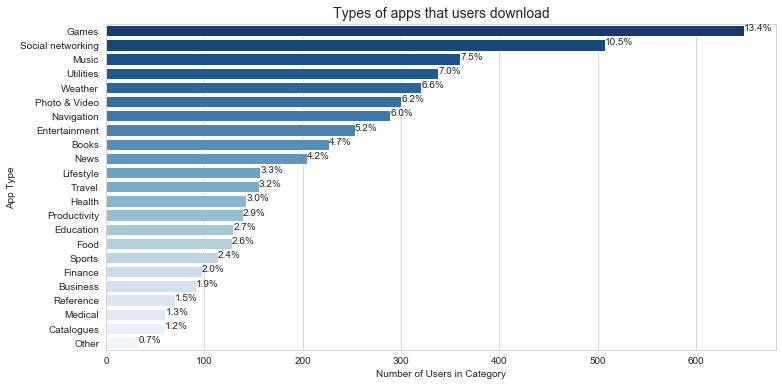

In [21]:
ax = plt.figure(figsize=(12, 6))
ax = sns.barplot(x=app_types.total, y=app_types.index, palette='Blues_r')
plt.title('Types of apps that users download', fontsize=14)
plt.xlabel('Number of Users in Category')
plt.ylabel('App Type')
ax.set_yticklabels(['Games', 'Social networking', 'Music', 'Utilities', 'Weather', 'Photo & Video', 'Navigation', 
                    'Entertainment', 'Books', 'News', 'Lifestyle', 'Travel', 'Health', 'Productivity', 'Education',
                    'Food', 'Sports', 'Finance', 'Business', 'Reference', 'Medical', 'Catalogues', 'Other'])

total = len(complete)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

The most popular app category was games (13%) followed by social networking (11%) and music apps (8%), which was consistent with the fact that the most common reason to download apps was to be entertained. Utility apps, weather apps  and navigation apps were very popular too, indicating that apps play an important role in supporting very specific tasks and providing specific information.

# Influencing Features

Apps must be advertised through app stores, potentially making non-functional and packaging requirements as important as functional requirements. In this section, we investigate the importance of app features versus descriptions, ratings, price, and perceived quality.

#### **Choice**

In [22]:
app_choice = complete[['other_users_reviews', 'app_name', 'app_downloads', 'app_icon', 'app_description', 'app_features',
                      'app_ratings_number', 'app_price', 'app_star_rating', 'app_size', 'app_screenshots', 'app_developer',
                      'apps_choosing_other']]

In [23]:
app_choice = to_hundred(app_choice)

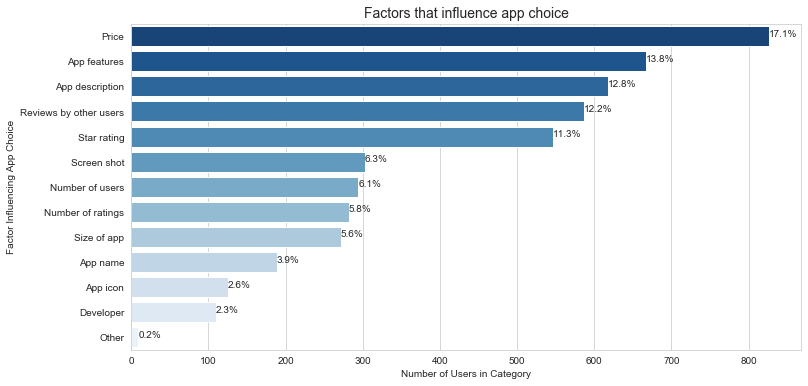

In [24]:
ax = plt.figure(figsize=(12, 6))
ax = sns.barplot(x=app_choice.total, y=app_choice.index, palette='Blues_r')
plt.title('Factors that influence app choice', fontsize=14)
plt.xlabel('Number of Users in Category')
plt.ylabel('Factor Influencing App Choice')
ax.set_yticklabels(['Price', 'App features', 'App description', 'Reviews by other users', 'Star rating', 
                    'Screen shot', 'Number of users', 'Number of ratings', 'Size of app', 'App name', 'App icon',
                    'Developer', 'Other'])

total = len(complete)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

The most important factors that people consider when choosing apps were: price (17%), app features (14%), app description (13%), reviews by other users (12%), and star ratings (11%). The least important factor that influenced a user’s choice of apps was the developer (2%). This meant that developers would find it difficult to use the success of their previous apps to promote future apps.

#### **Rating**

In [25]:
rating = complete[['dont_rate_apps', 'to_let_others_know_that_app_is_good', 'someone_asked_to_rate', 'app_asked_to_rate',
                   'to_let_others_know_that_app_is_bad', 'app_rewards_for_rating', 'why_rate_other']]

In [26]:
rating = to_hundred(rating)

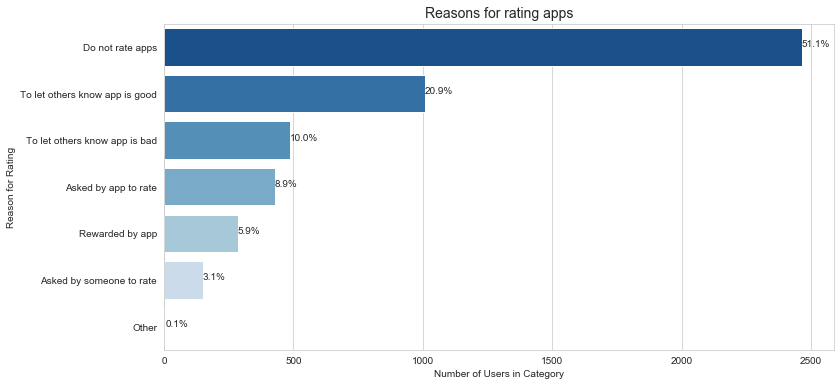

In [27]:
ax = plt.figure(figsize=(12, 6))
ax = sns.barplot(x=rating.total, y=rating.index, palette='Blues_r')
plt.title('Reasons for rating apps', fontsize=14)
plt.xlabel('Number of Users in Category')
plt.ylabel('Reason for Rating')
ax.set_yticklabels(['Do not rate apps', 'To let others know app is good', 'To let others know app is bad',
                    'Asked by app to rate', 'Rewarded by app', 'Asked by someone to rate', 'Other'])

total = len(complete)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Approximately 51% of users did not rate apps. The most popular reasons for rating apps was to let other users know that the app was good (21%), followed by to let other users know that the app was bad (10%). Interestingly, the app rewarding users to rate it (6%) was a less popular reason compared to the app simply reminding the users to rate it (9%). 

#### **Payment**

In [28]:
payment = complete[['do_not_pay_for_apps', 'to_remove_advertisements', 'on_sale', 'subscribe_to_free_content', 
                    'additional_features', 'no_similar_free_app', 'paid_apps_are_better', 'paid_apps_have_more_features', 
                    'additional_content', 'subscribe_to_paid_content', 'paid_app_appears_better', 'why_spend_on_app_other']]

In [29]:
payment = to_hundred(payment)

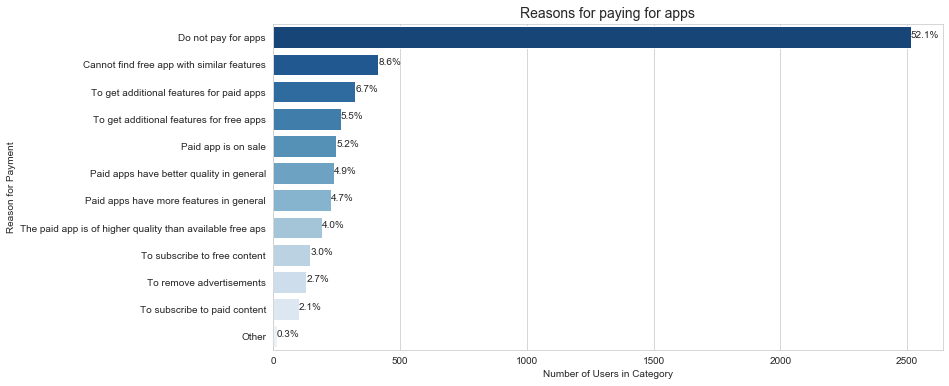

In [30]:
ax = plt.figure(figsize=(12, 6))
ax = sns.barplot(x=payment.total, y=payment.index, palette='Blues_r')
plt.title('Reasons for paying for apps', fontsize=14)
plt.xlabel('Number of Users in Category')
plt.ylabel('Reason for Payment')
ax.set_yticklabels(['Do not pay for apps', 'Cannot find free app with similar features', 
                    'To get additional features for paid apps', 'To get additional features for free apps',
                    'Paid app is on sale', 'Paid apps have better quality in general', 
                    'Paid apps have more features in general', 
                    'The paid app is of higher quality than available free aps', 'To subscribe to free content', 
                    'To remove advertisements', 'To subscribe to paid content', 'Other'])

total = len(complete)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Most app users did not pay for apps (52%). The most popular reasons to pay for apps were that users could not find free apps with similar features (9%). This was followed by the need to get additional features for paid apps (7%) and for free apps (6%), and that the apps were on sale (5%). Not many people paid to remove advertisements (3%). The least common reason people paid for apps was to subscribe for paid content (2%). This might be that when the content had to be paid for, users expected the app to be free.

#### **Abandonment**

In [31]:
abandon = complete[['it_crashes', 'found_better_alternatives', 'annoying_advertisements', 'usage_difficulty', 
                    'not_used_by_family_friends', 'features_are_extra', 'forgot_about_app', 'dont_need_features', 
                    'invades_privacy', 'slow', 'got_bored', 'doesnt_work', 'doesnt_have_desired_features', 
                    'dont_need_anymore', 'stop_app_other']]

In [32]:
abandon = to_hundred(abandon)

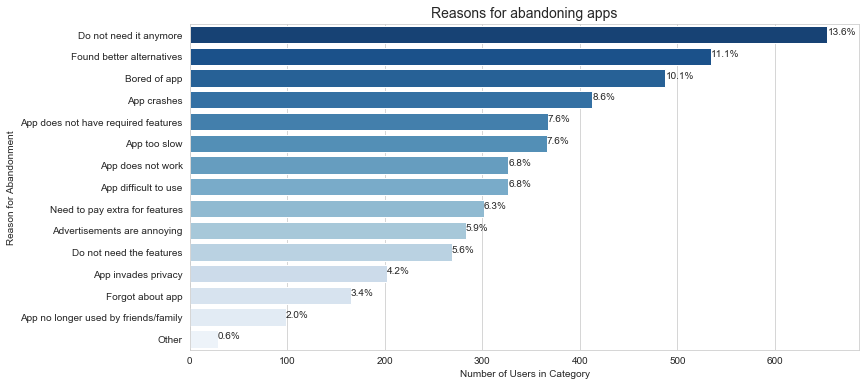

In [33]:
ax = plt.figure(figsize=(12, 6))
ax = sns.barplot(x=abandon.total, y=abandon.index, palette='Blues_r')
plt.title('Reasons for abandoning apps', fontsize=14)
plt.xlabel('Number of Users in Category')
plt.ylabel('Reason for Abandonment')
ax.set_yticklabels(['Do not need it anymore', 'Found better alternatives', 'Bored of app', 'App crashes',
                    'App does not have required features', 'App too slow', 'App does not work', 'App difficult to use',
                    'Need to pay extra for features', 'Advertisements are annoying', 'Do not need the features', 
                    'App invades privacy', 'Forgot about app', 'App no longer used by friends/family', 'Other'])

total = len(complete)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

The most common reason for app users to abandon an app was because they did not need the app anymore (14%). This was followed by finding better alternatives (11%) and getting bored of the app (10%). This finding suggested that many apps served temporary functions, unlike desktop software.
Non-functional requirements such as performance, reliability and usability, were important for app users. Reasons such as the app crashed, the app did not have the required features, the app was too slow, the app was difficult to use, the app did not work, were, on average, adequate reasons for more than 37% of users for abandoning an app. This result showed that the quality of an app was crucial to encourage continued usage.
Only 4% of users stopped using an app because it invaded their privacy. However, this might be due to app users being largely unaware of their privacy being invaded and the implications.

# **Distribution of users**

In this section, we will explore the demographics of the surveyed people.

#### **Gender Ratio**

In [34]:
complete.do_not_pay_for_apps = complete.do_not_pay_for_apps.fillna(0)
pays = {1:'No', 0:'Yes'}
complete.do_not_pay_for_apps.replace(pays, inplace=True)

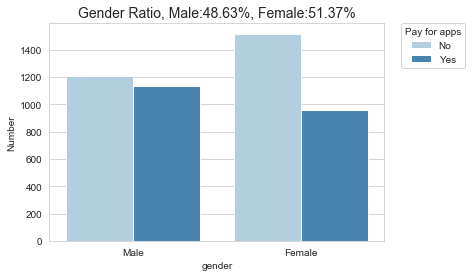

In [35]:
sns.countplot(x="gender", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.title(f"Gender Ratio, Male:{len(complete[complete.gender=='Male'])/len(complete) * 100:.2f}%, Female:{len(complete[complete.gender=='Female'])/len(complete) * 100:.2f}%", 
          fontsize=14)
plt.ylabel('Number')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tick_params(axis='x', rotation=0)

The data has a balanced gender ratio. The number of men who paid for apps is almost same as men who didn't. But there is a huge gap in this ratio for women.

#### **Nationality**

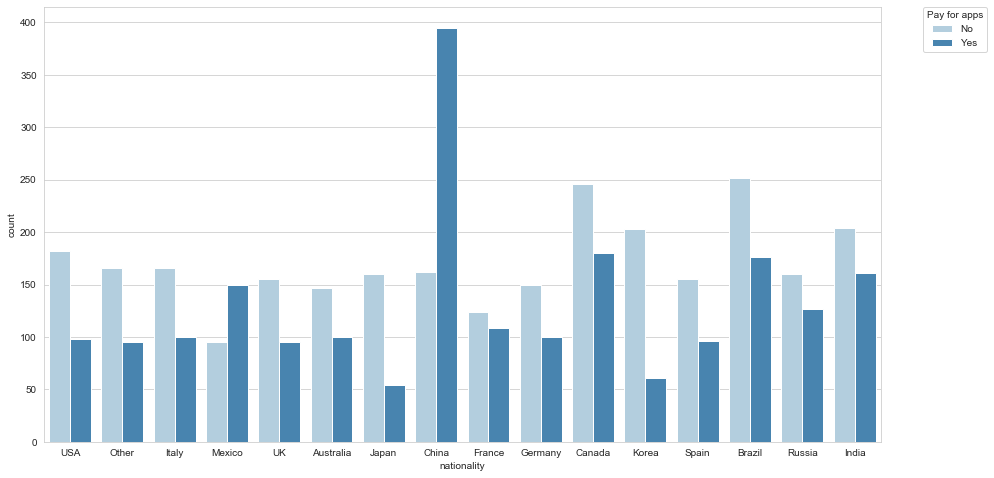

In [36]:
fig = plt.figure(figsize = (15, 8))
sns.countplot(x="nationality", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Very surprisingly, the number of users who pay for apps is more than twice the number of users who don't in China. Mexico is the only other country where more number of users pay for apps than don't. 

#### **Country of Residence**

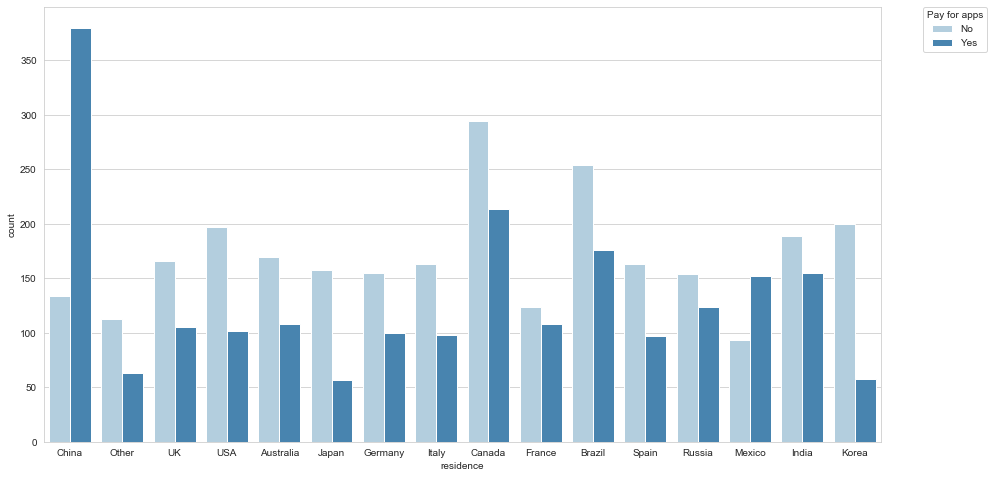

In [37]:
fig = plt.figure(figsize = (15, 8))
sns.countplot(x="residence", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### **Age**

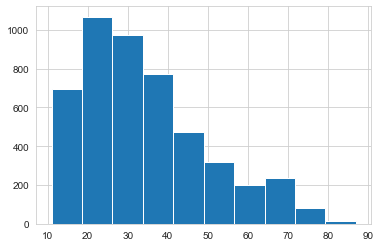

In [38]:
complete.age.hist()

For age, we have a right-skewed distribution with peak around 20.

# Personality Traits

Personality may influence the types of apps one likes and if they are willing to pay for an app. In this section, we explore the different personality traints on a scale of 1 to 7, where 1 is where they 'Strongly disagree' with a characteristic and 7 as 'Strongly agree'.

#### **Extraverted, Enthusiastic**

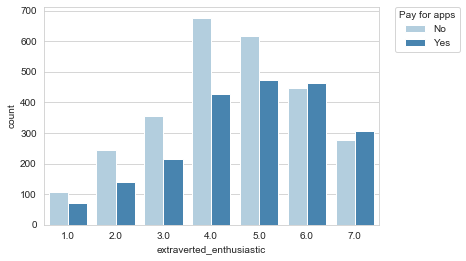

In [39]:
sns.countplot(x="extraverted_enthusiastic", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### **Critical, Quarrelsome**

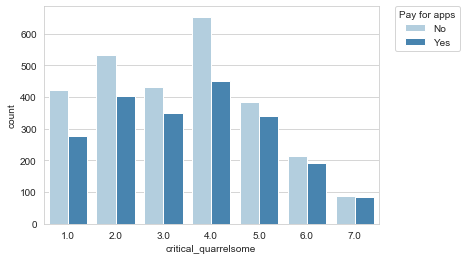

In [40]:
sns.countplot(x="critical_quarrelsome", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### **Dependable, Self-disciplined**

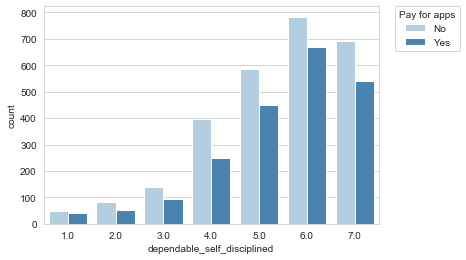

In [41]:
sns.countplot(x="dependable_self_disciplined", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### **Anxious, Easily upset**

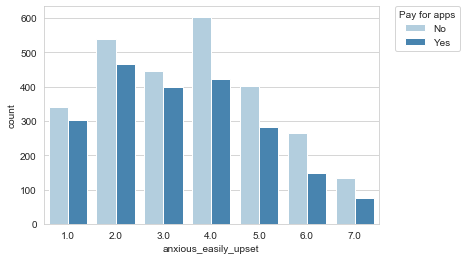

In [42]:
sns.countplot(x="anxious_easily_upset", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### **Open to new experiences, Complex**

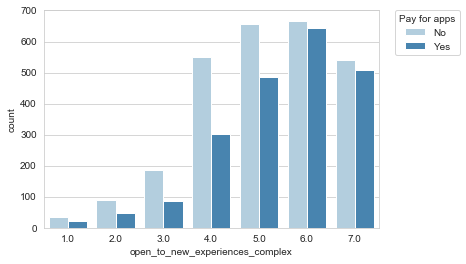

In [43]:
sns.countplot(x="open_to_new_experiences_complex", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### **Reserved, Quiet**

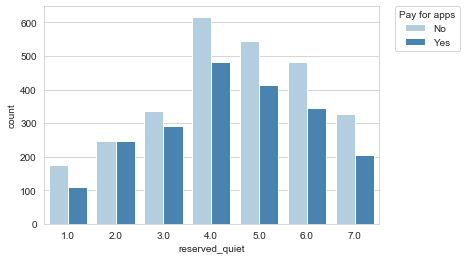

In [44]:
sns.countplot(x="reserved_quiet", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### **Sympathetic, Warm**

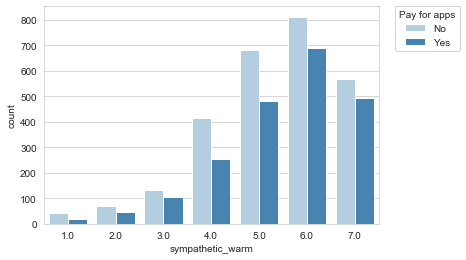

In [45]:
sns.countplot(x="sympathetic_warm", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### **Disorganized, Careless**

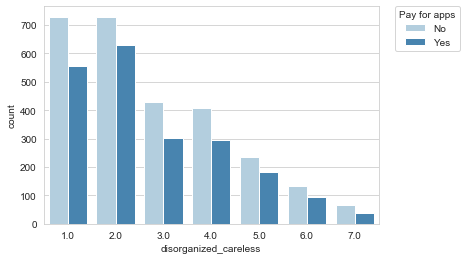

In [46]:
sns.countplot(x="disorganized_careless", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### **Calm, Emotionally stable**

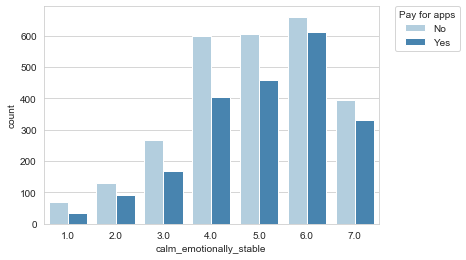

In [47]:
sns.countplot(x="calm_emotionally_stable", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### **Conventional, Uncreative**

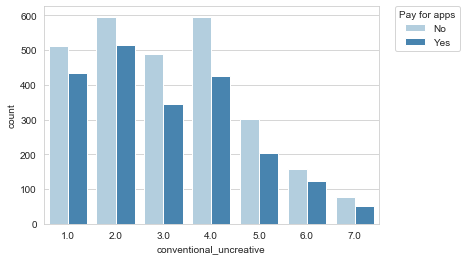

In [48]:
sns.countplot(x="conventional_uncreative", hue="do_not_pay_for_apps", data=complete, palette='Blues')
plt.legend(title='Pay for apps', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We see influence of scoial desirability bias from all the above personality traits' distributions.
 - For all traits, the most frequent rating was in between 2-6 which suggests that people shy away from rating themselves with strong characteristics
 - Traits with positive connotation such as extraverted, enthusiastic, dependable, self-disciplined, open to new experiences, sympathetic, warm, calm, emotionally stable showed left-skewed distribution i.e. majority of people agree that these traits apply to them
 - Traits with negative connotation such as critical, quarrelsome, anxious, easily upset, disorganized, careless, conventional, uncreative showed right-skewed distribution i.e. majority of people disagree that these traits apply to them
 - Reserved, quiet was the only trait which showed almost a normal distribution
 
 